In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.offline as py
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from math import pi

In [ ]:
final = pd.read_csv('./data_hcm_huy_final+.csv')

/tmp/ipykernel_50759/2490820301.py:1: DtypeWarning:

Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.



In [ ]:
detail = pd.read_csv('./data_hcm_detail (1).csv')

In [ ]:
menu_dish = pd.read_csv('./menu_dish.csv')
menu_dish

,RestaurantID,dish_type_id,dish_id,dish_name,dish_description,dish_price_value,dish_total_like,dish_is_available
0,865484,1204446.0,12657301.0,Trà Sữa Truyền Thống ( L),"Ly 700ml, có sẵn trân châu và thạch trái cây",30000.0,10+,True
1,1000024692,1759897.0,15940893.0,Cháo Trắng,NaN,15000.0,0,True
2,912704,-1.0,16058697.0,SET 1,Combo1 (Sz nhỏ) + Combo2 (Sz nhỏ) + Combo3 (Sz...,114000.0,1,True
3,896898,728163.0,7856672.0,Trà lipton,NaN,25000.0,0,True
4,668838,72293.0,4790919.0,Chả thêm,NaN,10000.0,2,True
...,...,...,...,...,...,...,...,...
1676631,1000022915,1727541.0,15491757.0,Sinh tố dưa gang,NaN,18000.0,0,True
1676632,1047572,1289893.0,11698013.0,Gato Flan,Lưu ý : Bánh dễ vỡ khi vận chuyển.,110000.0,2,True
1676633,96963,112309.0,1040739.0,Qué chiên giòn,NaN,90000.0,0,True
1676634,878303,625230.0,6897896.0,Ceasar salad,"Xà lách romaine trộn sốt ceasar, bánh mì nướng...",89000.0,0,True


In [ ]:
merge = final.merge(detail, on='RestaurantId')

In [ ]:
df = merge[merge.result == 'success']

In [ ]:
gk = df.groupby('District').mean().sort_values('nExcellentReviews', ascending=False).reset_index()

## 1. Sự phân bố avg_price, dish_price_value

In [ ]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

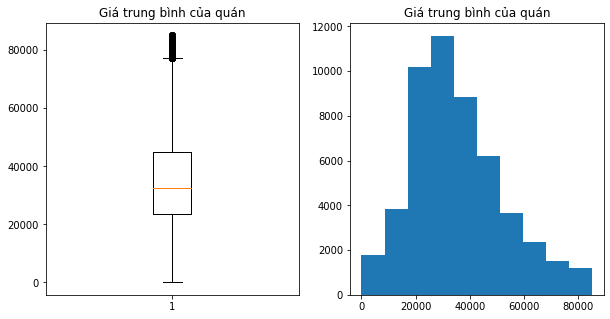

In [ ]:
avg_price_df = remove_outlier(df, 'avg_price')
fig = plt.figure(figsize =(10, 5))
plt.subplot(1, 2, 1)
# Creating plot
plt.boxplot(avg_price_df["avg_price"])
plt.title("Giá trung bình của quán")
# show plot
plt.subplot(1, 2, 2)

plt.hist(avg_price_df["avg_price"])
plt.title("Giá trung bình của quán")
plt.show()

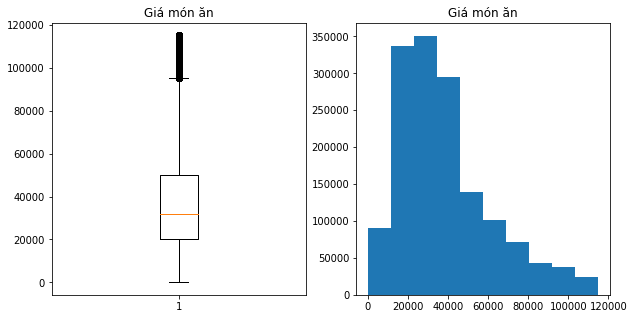

In [ ]:
dish_price_df = remove_outlier(menu_dish, 'dish_price_value')
fig = plt.figure(figsize =(10, 5))
plt.subplot(1, 2, 1)
# Creating plot
plt.boxplot(dish_price_df["dish_price_value"])
plt.title("Giá món ăn")
# show plot
plt.subplot(1, 2, 2)

plt.hist(dish_price_df["dish_price_value"])
plt.title("Giá món ăn")
plt.show()

## Tìm và trực quan mối quan hệ tương quan giữa các cặp biến.
## 2. Tương quan giữa các score: location, price, quality, serving, space, avg. ?

<AxesSubplot:>

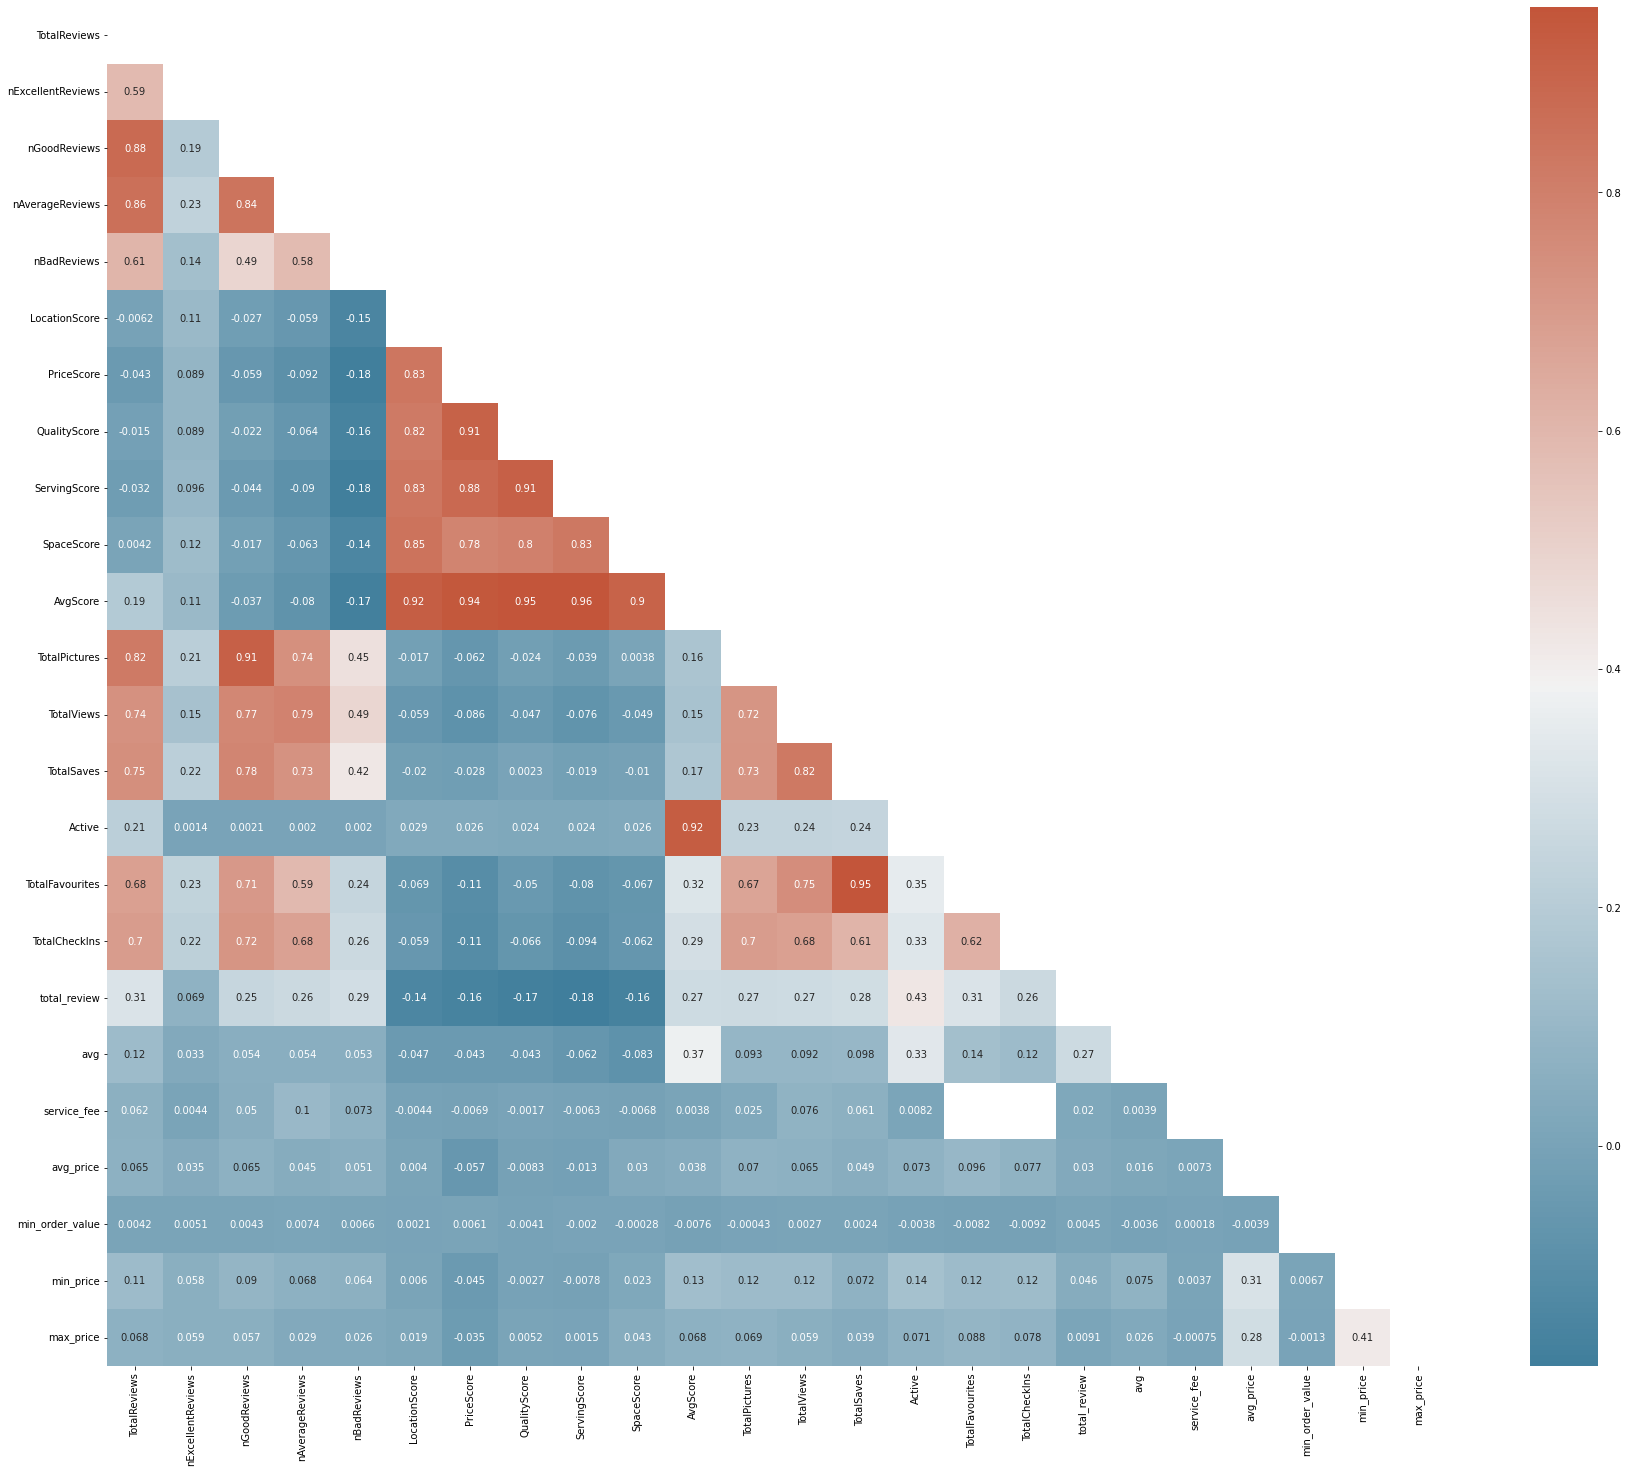

In [ ]:
x = df.drop(columns=['RestaurantId', 'RestaurantStatus', 'Longitude', 'Latitude', 'IsBooking', 'IsDelivery'])

f, ax = plt.subplots(figsize=(30, 25))
mask = np.triu(np.ones_like(x.corr(), dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(x.corr(), annot=True, mask = mask, cmap=cmap)

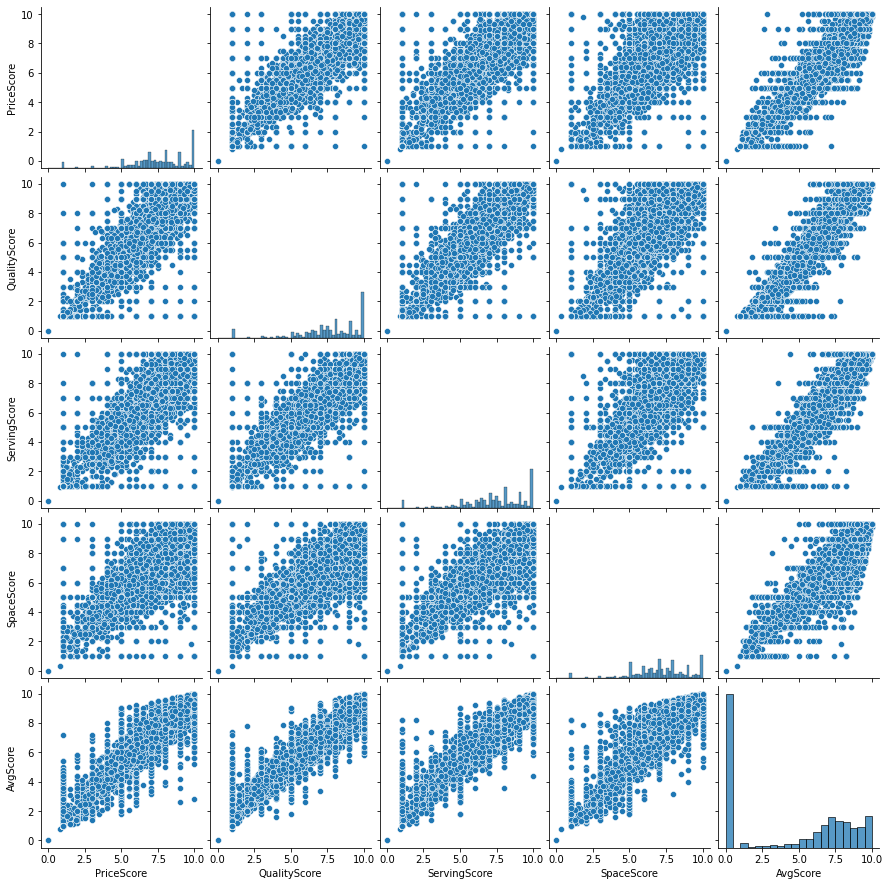

In [ ]:
sns.pairplot(df[['PriceScore', 'QualityScore', 'ServingScore', 'SpaceScore', 'AvgScore']])

## 3. Tỉ lệ % của 24 quận trong mỗi trường ?

In [ ]:
def district_visualization(vis_list):
    for label in vis_list:
        c_df = gk[['District', label]]
        c_df['phần trăm'] = np.round(100*c_df[label]/np.sum(c_df[label]), 2)
        c_df[''] = ''

        fig = px.bar(c_df, x='', y='phần trăm', color='District')
        fig.update_layout(title={'text': f"{label}" })
        fig.show()


In [ ]:
# input fields
test = ['nGoodReviews', 'TotalPictures', 'TotalViews', 'TotalFavourites']

In [ ]:
district_visualization(test)

/tmp/ipykernel_50759/3692863630.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_50759/3692863630.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



/tmp/ipykernel_50759/3692863630.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_50759/3692863630.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



/tmp/ipykernel_50759/3692863630.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_50759/3692863630.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



/tmp/ipykernel_50759/3692863630.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_50759/3692863630.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## 4. Xem xét sự liên quan của Good Review và AvgScore HCM?

In [ ]:
fig = px.bar(gk.sort_values('AvgScore', ascending=False).head(10), x='AvgScore', y='District',  orientation='h')
fig.update_layout(
    yaxis = dict(autorange="reversed")
)
fig.show()

In [ ]:
temp = gk.sort_values('nGoodReviews', ascending=False).head(20)
fig = make_subplots(specs=[[{'secondary_y': True}]])
fig.add_trace(go.Bar(x=temp['District'], y=temp['nGoodReviews'], name="Số lượng review tốt"), secondary_y=False)
fig.add_trace(go.Scatter(
    x=temp['District'], y=temp['AvgScore'], mode="markers+lines", name="Điểm số đánh giá trung bình"
), secondary_y=True)
fig.show()

## 5. Trong top 4 quận có điểm đánh giá trung bình (AvgScore) cao nhất, xem xét các yếu tố nào ảnh hưởng ?

In [ ]:
gk_top = gk.sort_values('AvgScore', ascending=False).head(4)

In [ ]:
x = pd.DataFrame({
    'group': gk_top.District.to_list(),
    'LocationScore': gk_top.LocationScore.to_list(),
    'ServingScore': gk_top.ServingScore.to_list(),
    'SpaceScore': gk_top.SpaceScore.to_list(),
    'PriceScore': gk_top.PriceScore.to_list(),
    'QualityScore': gk_top.QualityScore.to_list(),
})

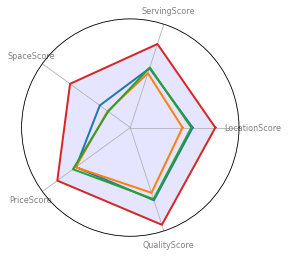

In [ ]:
categories=list(x)[1:]
N = len(categories)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
ax = plt.subplot(111, polar=True)
plt.xticks(angles[:-1], categories, color='grey', size=8)
ax.set_rlabel_position(0)
plt.yticks([0, 2, 4, 6, 8, 10], [], color="grey", size=7)
plt.ylim(6.5, 8)
 
# Plot data
for i in range(4):
    values=x.loc[i].drop('group').values.flatten().tolist()
    values += values[:1]
    values
    ax.plot(angles, values, linewidth=2, linestyle='solid')
 
# # Fill area
ax.fill(angles, values, 'b', alpha=0.1)

# Show the graph
plt.show()